In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from smarts import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pypvcell.solarcell import SQCell,MJCell

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
times=pd.date_range(start='2016-12-01 04:00',end='2016-12-10 23:00',freq='15T',tz='Japan')
df=get_clear_sky(times)
print(df.head())

                           WVLGTH  ET_SPCTRUM   BEAM_NORMAL    BEAM_NORM+  \
time                                                                        
2016-12-01 06:45:00+09:00   300.0      0.5200  7.466000e-28  7.466000e-28   
2016-12-01 06:45:00+09:00   302.0      0.5468  2.534000e-26  2.534000e-26   
2016-12-01 06:45:00+09:00   304.0      0.5871  5.658000e-25  5.658000e-25   
2016-12-01 06:45:00+09:00   306.0      0.6154  9.159000e-24  9.159000e-24   
2016-12-01 06:45:00+09:00   308.0      0.6337  1.124000e-22  1.124000e-22   

                             GLOB_HORIZ    GLOBL_TILT  
time                                                   
2016-12-01 06:45:00+09:00  5.630000e-07  5.085000e-07  
2016-12-01 06:45:00+09:00  1.425000e-06  1.287000e-06  
2016-12-01 06:45:00+09:00  3.593000e-06  3.246000e-06  
2016-12-01 06:45:00+09:00  8.195000e-06  7.404000e-06  
2016-12-01 06:45:00+09:00  1.621000e-05  1.465000e-05  


In [37]:
df.to_hdf('store_tl.h5',key='df',mode='w')

In [47]:
ndf=pd.read_hdf('store_tl.h5')
df=ndf

In [48]:
# Set up a basic solar cells
ingap_cell=SQCell(1.9,297,rad_eta=0.001)
gaas_cell=SQCell(1.42,297,rad_eta=0.01)

si_cell=SQCell(1.12,297,rad_eta=0.001)
si_cell.set_description("Si")

future_si_cell=SQCell(1.12,297,rad_eta=0.01)
future_si_cell.set_description("future Si")

future_backplane_cell=SQCell(1.42,297,rad_eta=0.01)
future_backplane_cell.set_description("fp-GaAs")

ge_cell=SQCell(0.67,297,rad_eta=0.0001)
one_ev_cell=SQCell(1.0,297,rad_eta=1e-5)

twoj_cell=MJCell([ingap_cell,gaas_cell])
twoj_cell.set_description("2J")
threej_cell=MJCell([ingap_cell,gaas_cell,ge_cell])
threej_cell.set_description("3J")

fourj_cell=MJCell([ingap_cell,gaas_cell,one_ev_cell,ge_cell])
fourj_cell.set_description("4J")

In [49]:
# some of the time index does not have sun spectrum because azimuthal angle < , we need to filter out this
new_time=pd.unique(df.index)

In [50]:
new_time

array(['2016-11-30T21:45:00.000000000', '2016-11-30T22:00:00.000000000',
       '2016-11-30T22:15:00.000000000', '2016-11-30T22:30:00.000000000',
       '2016-11-30T22:45:00.000000000', '2016-11-30T23:00:00.000000000',
       '2016-11-30T23:15:00.000000000', '2016-11-30T23:30:00.000000000',
       '2016-11-30T23:45:00.000000000', '2016-12-01T00:00:00.000000000',
       '2016-12-01T00:15:00.000000000', '2016-12-01T00:30:00.000000000',
       '2016-12-01T00:45:00.000000000', '2016-12-01T01:00:00.000000000',
       '2016-12-01T01:15:00.000000000', '2016-12-01T01:30:00.000000000',
       '2016-12-01T01:45:00.000000000', '2016-12-01T02:00:00.000000000',
       '2016-12-01T02:15:00.000000000', '2016-12-01T02:30:00.000000000',
       '2016-12-01T02:45:00.000000000', '2016-12-01T03:00:00.000000000',
       '2016-12-01T03:15:00.000000000', '2016-12-01T03:30:00.000000000',
       '2016-12-01T03:45:00.000000000', '2016-12-01T04:00:00.000000000',
       '2016-12-01T04:15:00.000000000', '2016-12-01

In [51]:
df.loc[new_time[5],:].head()

,WVLGTH,ET_SPCTRUM,BEAM_NORMAL,BEAM_NORM+,GLOB_HORIZ,GLOBL_TILT
time,,,,,,
2016-12-01 08:00:00+09:00,300.0,0.5200,2.564000e-07,2.647000e-07,0.000024,0.000022
2016-12-01 08:00:00+09:00,302.0,0.5468,1.435000e-06,1.481000e-06,0.000077,0.000070
2016-12-01 08:00:00+09:00,304.0,0.5871,6.378000e-06,6.579000e-06,0.000219,0.000200
2016-12-01 08:00:00+09:00,306.0,0.6154,2.330000e-05,2.402000e-05,0.000577,0.000530
2016-12-01 08:00:00+09:00,308.0,0.6337,7.113000e-05,7.330000e-05,0.001376,0.001267


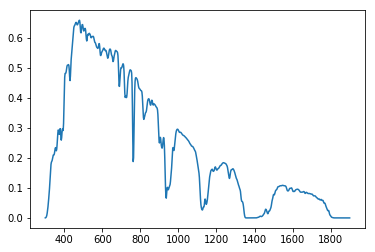

In [52]:
plot_df=df.loc[new_time[10],:]
plt.plot(plot_df['WVLGTH'],plot_df['GLOB_HORIZ'])

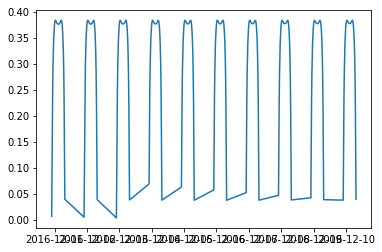

In [53]:
eta_array=[]
test_cell=fourj_cell
for t in new_time:
    time_spec=df.loc[t,:]
    spec_d=spec_data_to_spec_class(time_spec)
    ill=spec_d['direct_exp']
    test_cell.set_input_spectrum(ill)
    eta=test_cell.get_eta()
    eta_array.append(eta)

eta_array=np.array(eta_array)
plt.plot(new_time,eta_array)
    

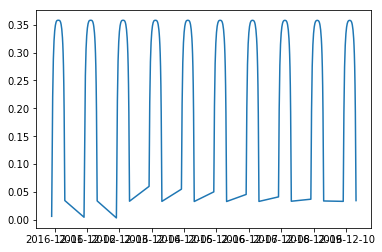

In [54]:
eta_array=[]
test_cell=threej_cell
for t in new_time:
    time_spec=df.loc[t,:]
    spec_d=spec_data_to_spec_class(time_spec)
    ill=spec_d['direct_exp']
    test_cell.set_input_spectrum(ill)
    eta=test_cell.get_eta()
    eta_array.append(eta)

eta_array=np.array(eta_array)
plt.plot(new_time,eta_array)

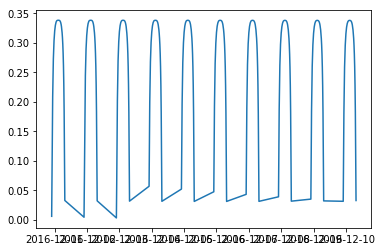

In [55]:
eta_array=[]
test_cell=twoj_cell
for t in new_time:
    time_spec=df.loc[t,:]
    spec_d=spec_data_to_spec_class(time_spec)
    ill=spec_d['direct_exp']
    test_cell.set_input_spectrum(ill)
    eta=test_cell.get_eta()
    eta_array.append(eta)

eta_array=np.array(eta_array)
plt.plot(new_time,eta_array)

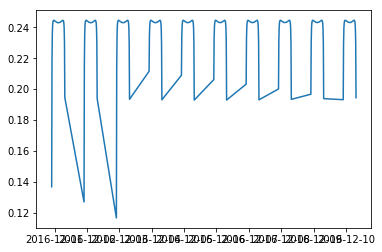

In [56]:
eta_array=[]
test_cell=si_cell
for t in new_time:
    time_spec=df.loc[t,:]
    spec_d=spec_data_to_spec_class(time_spec)
    ill=spec_d['direct_exp']
    test_cell.set_input_spectrum(ill)
    eta=test_cell.get_eta()
    eta_array.append(eta)

eta_array=np.array(eta_array)
plt.plot(new_time,eta_array)